Importando as bibliotecas

In [1]:

from matplotlib import pyplot
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import random
import keras
import collections

from keras.datasets import mnist

from keras.utils import np_utils   
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.core import Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


Carregando os dados MNIST para variáveis

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Verificando quantidade para treino e teste
print('Imagens de treino:', X_train.shape[0])
print('Imagens de teste:', X_test.shape[0])

Imagens de treino: 60000
Imagens de teste: 10000


Mostrando quantidade de dados para treino e teste por dígito


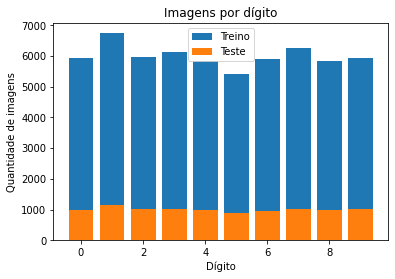

In [3]:
counterTrain=collections.Counter(y_train)
counterTest=collections.Counter(y_test)

fig, ax = pyplot.subplots()
rects1 = ax.bar(counterTrain.keys(), counterTrain.values(), label='Treino')
rects3 = ax.bar(counterTest.keys(), counterTest.values(), label='Teste')

ax.set_title('Imagens por dígito')
ax.set_ylabel('Quantidade de imagens')
ax.set_xlabel('Dígito')
ax.legend()
pyplot.show()

Plotando os primeiros exemplos para verificar os dados

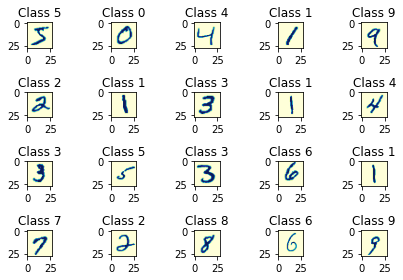

In [4]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i], cmap='YlGnBu')
    plt.title("Class {}".format(y_train[i]))
plt.tight_layout()

Alterando de matriz para vetor (estrutura dos digitos) para padrão do KERAS

In [5]:
#Alterando de matriz 28x28 para vetor 1x784
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

#Alterando valores dos pixels para float (garantindo precisão em operações de divisão por exemplo)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizando os valores dos pixels (valores entre 0 e 1)
X_train /= 255                      
X_test /= 255

Converte as classes dos vetores em binário

In [6]:
nClasses = 10

Y_train = np_utils.to_categorical(y_train, nClasses)
Y_test = np_utils.to_categorical(y_test, nClasses)

Criando o modelo

In [7]:
#Iniciando o modelo
model = Sequential()
#Criando a primeira camada com 512 neurônios 
model.add(Dense(512, input_shape=(784,)))
#Utilizando a função de ativação ReLu
model.add(Activation('relu'))
#Dropout de 20% dos neuronios
model.add(Dropout(0.2))

#Criando a segunda camada, com as mesmas características que a primeira
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#Criando a camada de saída, com 10 (um para cada dígito) neurônios e a função SoftMax para ativação
model.add(Dense(10))
model.add(Activation('softmax'))

#Mostra o modelo criado
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Criando um otimizador para rede

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Treinando o modelo

In [9]:
historico = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
60000/60000 [==============================] - 8s 141us/step - loss: 0.2497 - accuracy: 0.9260
Epoch 2/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.1014 - accuracy: 0.9689
Epoch 3/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.0725 - accuracy: 0.9772
Epoch 4/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.0547 - accuracy: 0.9833
Epoch 5/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.0459 - accuracy: 0.9854


Plotando o histórico de treino (Acurácia e Perda)

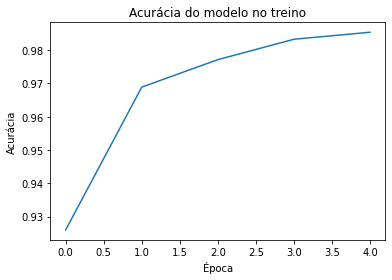

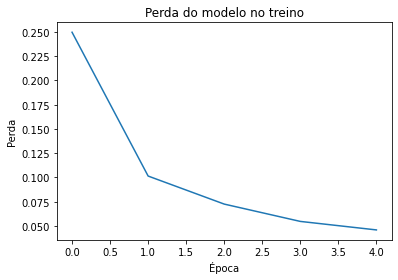

In [10]:
#Histórico de acurácia
pyplot.plot(historico.history['accuracy'])
pyplot.title('Acurácia do modelo no treino')
pyplot.ylabel('Acurácia')
pyplot.xlabel('Época')
pyplot.show()
#Histórico de perda
pyplot.plot(historico.history['loss'])
pyplot.title('Perda do modelo no treino')
pyplot.ylabel('Perda')
pyplot.xlabel('Época')
pyplot.show()

Avaliando a rede

In [11]:
score = model.evaluate(X_test, Y_test)
print('Perda do Teste:', score[0])
print('Acurácia do Teste:', score[1])

10000/10000 [==============================] - 1s 63us/step
Perda do Teste: 0.061494452015974095
Acurácia do Teste: 0.9825000166893005


Gerando as previsões

In [12]:
previsoes = model.predict_classes(X_test)

Verificando as previsões

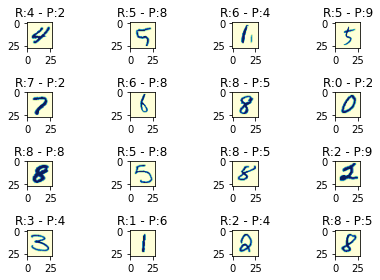

In [13]:
plt.figure()
for i in range(16):
    plt.subplot(4,4,i+1)
    num = random.randint(0, len(X_test))
    plt.imshow(X_test[num].reshape(28,28), cmap='YlGnBu')
    plt.title("R:{} - P:{}".format(previsoes[num], y_train[num]))
plt.tight_layout()

Verificando apenas previsões corretas

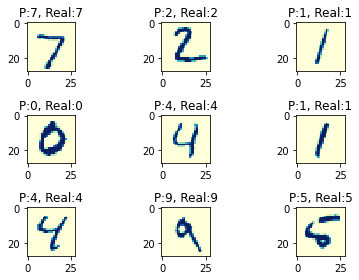

In [14]:
#Comparando as previsões com os dados de teste e guardando os indíces corretos
idxCorreto = np.nonzero(previsoes == y_test)[0]

plt.figure()
for i, correto in enumerate(idxCorreto[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correto].reshape(28,28), cmap='YlGnBu', interpolation='none')
    plt.title("P:{}, Real:{}".format(previsoes[correto], y_test[correto]))
    
plt.tight_layout()

Verificando apenas previsões incorretas

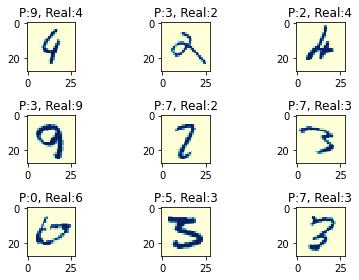

In [15]:
#Comparando as previsões com os dados de teste e guardando os indíces incorretos
idxIncorreto = np.nonzero(previsoes != y_test)[0]

plt.figure()
for i, incorreto in enumerate(idxIncorreto[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorreto].reshape(28,28), cmap='YlGnBu', interpolation='none')
    plt.title("P:{}, Real:{}".format(previsoes[incorreto], y_test[incorreto]))
    
plt.tight_layout()

Matriz de confusão para verificar os erros

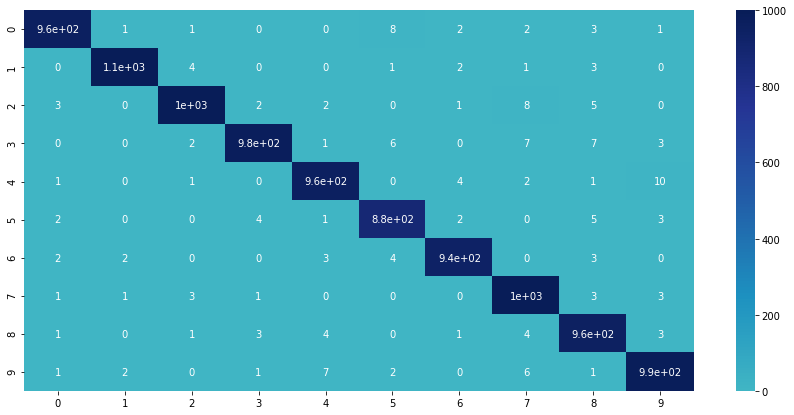

In [16]:
confusao = confusion_matrix(y_test, previsoes)
plt.figure(figsize=(15, 7))
sns.heatmap(confusao, annot=True,vmin=0, vmax=1000, cmap="YlGnBu", center = 0)
plt.show()